## Pure Monte Carlo (MCMC) sampling ##
Importance Sampling
---
Using sampling to approximate a distribution

$$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_{i} f(x_i)$$
where $ x \sim p(x)$

$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$

Idea of importance sampling: draw the sample from a proposal distribution and re-weight the integral using importance weights so that the correct distribution is targeted

$$Var(X) = E[X^2] - E[X]^2$$


## Example 1 of importance sampling

In [66]:
# Example of importance sampling in Python

import numpy as np
from scipy.stats import norm

n = 10000 # Number of Monte Carlo samples

np.random.seed(0) # Initialization of random number generator for replicability

# Standard Monte Carlo
x = np.random.randn(n, 1)
g = 10 * np.exp(-5 * (x - 3) ** 4)
MC = np.mean(g)
std_MC = np.sqrt(( 1 / n) * np.var(g))
print('Standard Monte-Carlo estimate of the expected value: ' + str(MC))
print('Standard deviation of plain-vanilla Monte Carlo: ' + str(std_MC))
print(' ')

# Importance sampling
y = 3 + np.random.randn(n, 1);
g = 10 * np.exp(-5 * (y  - 3) ** 4);
g_weighted = g * norm.pdf(y, 0, 1) / norm.pdf(y, 3, 1);
IS = np.mean(g_weighted)
std_IS = np.sqrt((1 / n) * np.var(g_weighted))
print('Importance-sampling Monte-Carlo estimate of the expected value: ' + str(IS))
print('Standard deviation of importance-sampling Monte Carlo: ' + str(std_IS))

Standard Monte-Carlo estimate of the expected value: 0.08579415409780462
Standard deviation of plain-vanilla Monte Carlo: 0.007904811247115087
 
Importance-sampling Monte-Carlo estimate of the expected value: 0.09096069224808337
Standard deviation of importance-sampling Monte Carlo: 0.0011925073695279826


## Example 2 of importance sampling

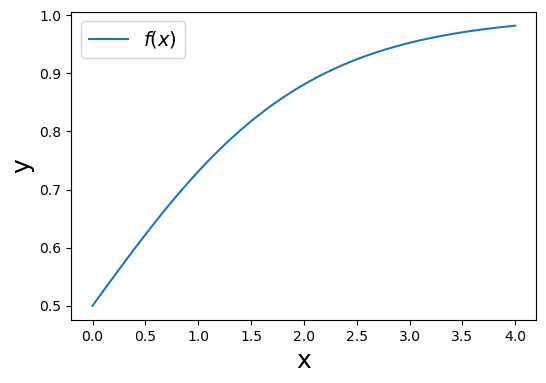

In [68]:
def f_x(x):
    return 1/(1 + np.exp(-x))

def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

plt.figure(figsize=[6, 4])
x = np.linspace(0, 4, 50)  # x ranges from 0 to 4
y = [f_x(i) for i in x]

plt.plot(x, y, label="$f(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(prop={"size": 14})

## Sampling

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



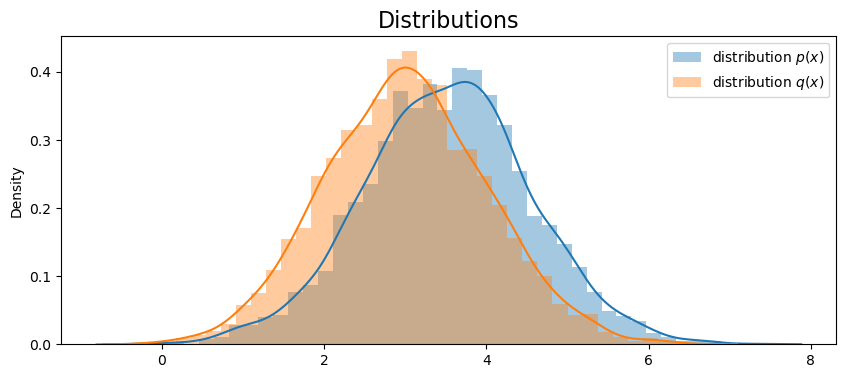

In [103]:
import scipy.stats as stats
import seaborn as sns

# pre-setting
n = 1000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

#simpling/target distribution
p_x = distribution(mu_target, sigma_target)
#proposal distribution
q_x = distribution(mu_appro, sigma_appro)

plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [72]:
# value
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
print("simulate value", s/n)

# calculate value sampling from a different distribution

value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

simulate value 0.9549975623967805
average 0.9487821822916341 variance 0.2950013242336597


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 1.0, 'Distributions')

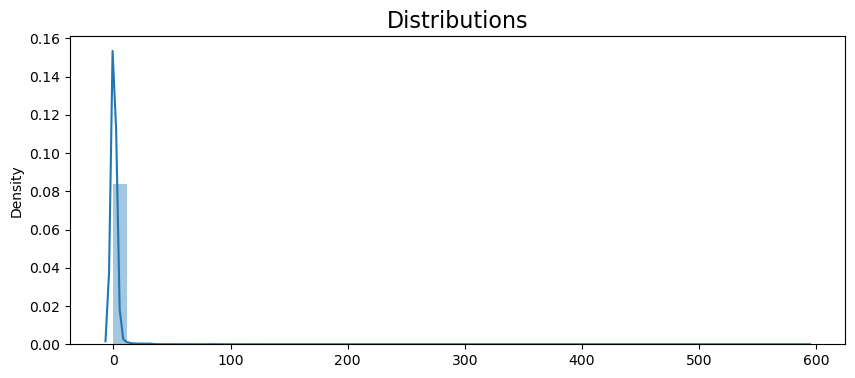

In [108]:
plt.figure(figsize=[10, 4])
sns.distplot(value_list, label="distribution $q(x)$")
plt.title("Distributions", size=16)

## Different $q(x)$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  from ipykernel import kernelapp as app


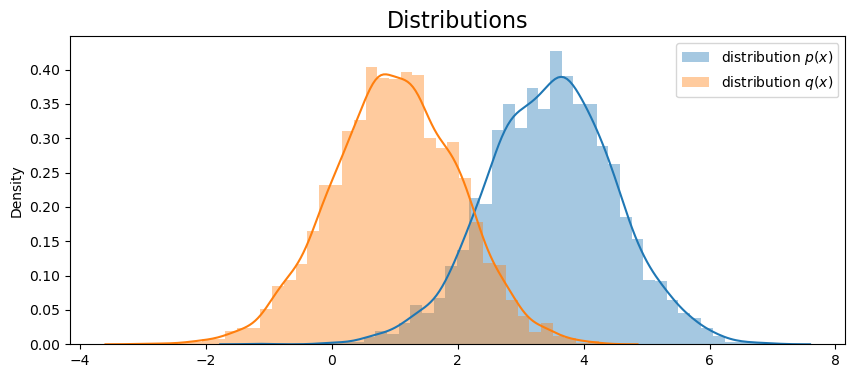

In [73]:
# pre-setting
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [74]:
# calculate value sampling from a different distribution

value_list = []
# need larger steps
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 1.03347241919433 variance 154.89575590297025


# Markov chain Monte Carlo (MCMC) sampling, part 1: the basics

https://www.tweag.io/blog/2019-10-25-mcmc-intro1/

[Markov chain Monte Carlo (MCMC)](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) is a powerful class of methods to sample from probability distributions known only up to an (unknown) normalization constant. But before we dive into MCMC, let's consider why you might want to do sampling in the first place.

The answer to that is: whenever you're either interested in the samples themselves (for example, inferring unknown parameters in Bayesian inference) or you need them to approximate expected values of functions w.r.t. to a probability distribution (for example, calculating thermodynamic quantities from the distribution of microstates in statistical physics). Sometimes, only the mode of a probability distribution is of primary interest. In this case, it's obtained by numerical optimization so full sampling is not necessary.

It turns out that sampling from any but the most basic probability distributions is a difficult task. [Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) is an elementary method to sample from probability distributions, but requires the cumulative distribution function, which in turn requires knowledge of the, generally unknown, normalization constant. Now in principle, you could just obtain the normalization constant by numerical integration, but this quickly gets infeasible with an increasing number of dimensions. [Rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling) does not require a normalized distribution, but efficiently implementing it requires a good deal of knowledge about the distribution of interest, and it suffers strongly from the curse of dimension, meaning that its efficiency decreases rapidly with an increasing number of variables. That's when you need a smart way to obtain representative samples from your distribution which doesn't require knowledge of the normalization constant.

MCMC algorithms are a class of methods which do exactly that. These methods date back to a [seminal paper by Metropolis et al.](https://pdfs.semanticscholar.org/7b3d/c9438227f747e770a6fb6d7d7c01d98725d6.pdf), who developed the first MCMC algorithm, correspondingly called [Metropolis algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), to calculate the equation of state of a two-dimensional system of hard spheres. In reality, they were looking for a general method to calculate expected values occurring in statistical physics.

In this blog post, I introduce the basics of MCMC sampling; in subsequent posts I'll cover several important, increasingly complex and powerful MCMC algorithms, which all address different difficulties one frequently faces when using the Metropolis-Hastings algorithm. Along the way, you will gain a solid understanding of these challenges and how to address them. Also, this serves as a reference for MCMC methods in the context of the [monad-bayes](https://www.tweag.io/posts/2019-09-20-monad-bayes-1.html) series. Furthermore, I hope the provided notebooks will not only spark your interest in exploring the behavior of MCMC algorithms for various parameters/probability distributions, but also serve as a basis for implementing and understanding useful extensions of the basic versions of the algorithms I present.

## Markov chains

Now that we know why we want to sample, let's get to the heart of MCMC &mdash; Markov chains.
What is a Markov chain?
Without all the technical details, a Markov chain is a random sequence of states in some state space in which the probability of picking a certain state next depends only on the current state in the chain and not on the previous history: it is memory-less.
Under certain conditions, a Markov chain has a unique stationary distribution of states to which it will converge after a certain number of states.
From that number on, states in the Markov chain will be distributed according to the invariant distribution.
MCMC algorithms work by constructing a Markov chain with the probability distribution you want to sample from as the stationary distribution.
In order to sample from a distribution $\pi(x)$, a MCMC algorithm constructs and simulates a Markov chain whose stationary distribution is $\pi(x)$, meaning that, after an initial "burn-in" phase, the states of that Markov chain are distributed according to $\pi(x)$. We thus just have to store the states to obtain samples from $\pi(x)$.

For didactic purposes, let's for now consider both a discrete state space and discrete "time".
The key quantity characterizing a Markov chain is the transition operator $T(x_{i+1}|x_i)$ which gives you the probability of being in state $x_{i+1}$ at time $i+1$ given that the chain is in state $x_i$ at time $i$.

Now just for fun (and for illustration), let's quickly whip up a Markov chain which has a unique stationary distribution. We'll start with some imports and settings for the plots:

In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

The Markov chain will hop around on a discrete state space which is made up from three weather states:

In [2]:
state_space = ("sunny", "cloudy", "rainy")

In a discrete state space, the transition operator is just a matrix.
Columns and rows correspond, in our case, to sunny, cloudy, and rainy weather.
We pick more or less sensible values for all transition probabilities:

In [3]:
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

The rows indicate the states the chain might currently be in and the columns the states the chains might transition to.
If we take one "time" step of the Markov chain as one hour, then, if it's sunny, there's a 60% chance it stays sunny in the next hour, a 30% chance that in the next hour we will have cloudy weather and only a 10% chance of rain immediately after it had been sunny before.
This also means that each row has to sum up to one.

Let's run our Markov chain for a while:np.random.choice 

**zphilip48**: using exactly the current state --- states[-1] and the corresponding transition_matrix[states[-1]] apply to next state by the np.random.choice 
**the result is recorded into states**

In [41]:
n_steps = 20000
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2), p=transition_matrix[states[-1]]))
states = np.array(states)

We can monitor the convergence of our Markov chain to its stationary distribution by calculating the empirical probability for each of the states as a function of chain length:

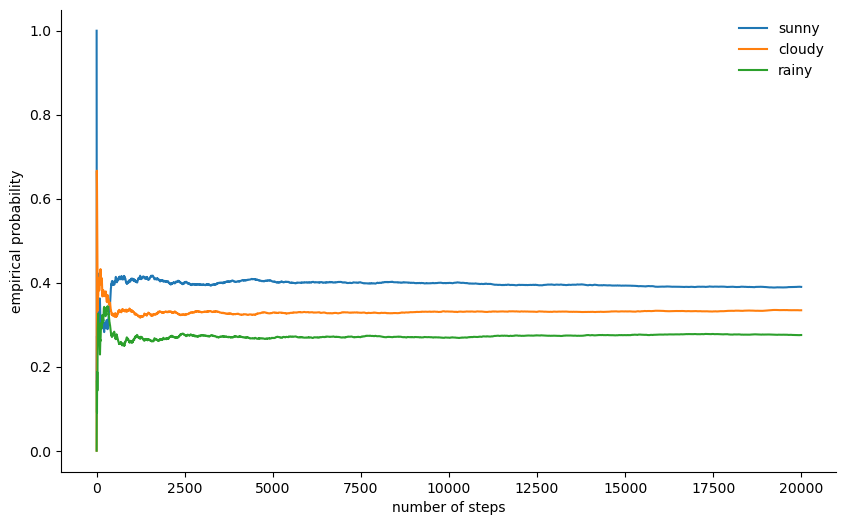

In [42]:
def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

fig, ax = plt.subplots()
width = 1000
#calcuate the data every offsets 
offsets = range(1, n_steps, 5)
for i, label in enumerate(state_space):
    #here cacluate the sum of the frequence of the certain states and normalize it is the eactly \pi(x)
    ax.plot(offsets, [np.sum(states[:offset] == i) / offset 
            for offset in offsets], label=label)
ax.set_xlabel("number of steps")
ax.set_ylabel("empirical probability")
ax.legend(frameon=False)
despine(ax, ('top', 'right'))
plt.show()

## The mother of all MCMC algorithms: Metropolis-Hastings

So that's lots of fun, but back to sampling an arbitrary probability distribution $\pi$. 
It could either be discrete, in which case we would keep talking about a transition matrix $T$, or it continous, in which case $T$ would be a transition *kernel*.
From now on, we're considering continuous distributions, but all concepts presented here transfer to the discrete case.  
If we could design the transition kernel in such a way that the next state is already drawn from $\pi$, we would be done, as our Markov Chain would... well...  immediately sample from $\pi$.
Unfortunately, to do this, we need to be able to sample from $\pi$, which we can't.
Otherwise you wouldn't be reading this, right?  
A way around this is to split the transition kernel $T(x_{i+1}|x_i)$ into two parts:
a proposal step and an acceptance/rejection step. The proposal step features a proposal distribution $q(x_{i+1}|x_i)$, from which we can sample possible next states of the chain. In addition to being able to sample from it, we can choose this distribution arbitrarily. But, one should strive to design it such that samples from it are both as little correlated with the current state as possible and have a good chance of being accepted in the acceptance step. Said acceptance/rejection step is the second part of the transition kernel and corrects for the error introduced by proposal states drawn from $q \neq \pi$. It involves calculating an acceptance probability $p_\mathrm{acc}(x_{i+1}|x_i)$ and accepting the proposal $x_{i+1}$ with that probability as the next state in the chain. Drawing the next state $x_{i+1}$ from $T(x_{i+1}|x_i)$ is then done as follows: first, a proposal state $x_{i+1}$ is drawn from $q(x_{i+1}|x_i)$. It is then accepted as the next state with probability 
$p_\mathrm{acc}(x_{i+1}|x_i)$ or rejected with probability $1 - p_\mathrm{acc}(x_{i+1}|x_i)$, in which case the current state is copied as the next state.

We thus have 
$$
T(x_{i+1}|x_i)=q(x_{i+1} | x_i) \times p_\mathrm{acc}(x_{i+1}|x_i) \ \mbox .
$$
A sufficient condition for a Markov chain to have $\pi$ as its stationary distribution is the transition kernel obeying *detailed balance* or, in the physics literature, *microscopic reversibility*:
$$
\pi(x_i) T(x_{i+1}|x_i) = \pi(x_{i+1}) T(x_i|x_{i+1})
$$
This means that the probability of being in a state $x_i$ and transitioning to $x_{i+1}$ must be equal to the probability of the reverse process, namely, being in state $x_{i+1}$ and transitioning to $x_i$.
Transition kernels of most MCMC algorithms satisfy this condition.   
For the two-part transition kernel to obey detailed balance, we need to choose $p_\mathrm{acc}$ correctly, meaning that is has to correct for any asymmetries in probability flow from / to $x_{i+1}$ or $x_i$.
One possibility is the Metropolis acceptance criterion: 
$$
p_\mathrm{acc}(x_{i+1}|x_i) = \mathrm{min} \left\{1, \frac{\pi(x_{i+1}) \times q(x_i|x_{i+1})}{\pi(x_i) \times q(x_{i+1}|x_i)} \right\} \ \mbox .
$$
Now here's where the magic happens: we know $\pi$ only up to a constant, but it doesn't matter, because that unknown constant cancels out in the expression for $p_\mathrm{acc}$! It is this property of $p_\mathrm{acc}$ which makes algorithms based on Metropolis-Hastings work for unnormalized distributions. Often, symmetric proposal distributions with $q(x_i|x_{i+1})=q(x_{i+1}|x_i)$ are used, in which case the Metropolis-Hastings algorithm reduces to the original, but less general Metropolis algorithm developed in 1953 and for which
$$
p_\mathrm{acc}(x_{i+1}|x_i) = \mathrm{min} \left\{1, \frac{\pi(x_{i+1})}{\pi(x_i)} \right\} \ \mbox .
$$
We can then write the complete Metropolis-Hastings transition kernel as
$$
T(x_{i+1}|x_i) = \begin{cases}
                   q(x_{i+1}|x_i) \times p_\mathrm{acc}(x_{i+1}|x_i) &: x_{i+1} \neq x_i \mbox ; \\
                   1 - \int \mathrm{d}x_{i+1} \ q(x_{i+1}|x_i) \times p_\mathrm{acc}(x_{i+1}|x_i) &: x_{i+1} = x_i\mbox .
                 \end{cases} 
$$

## Implementing the Metropolis-Hastings algorithm in Python

All right, now that we know how Metropolis-Hastings works, let's go ahead and implement it.
First, we set **the log-probability of the distribution we want to sample from** - **without normalization constants**, as we pretend we don't know them.
in practise we might even don't the equation but just generate the data from lab system.
Let's work for now with a standard normal distribution:

In [54]:
def log_prob(x):
     return -0.5 * np.sum(x ** 2)

Next, we choose a symmetric proposal distribution.
Generally, including information you have about the distribution you want to sample from in the proposal distribution will lead to better performance of the Metropolis-Hastings algorithm. 
A naive approach is to just take the current state $x$ and pick a proposal from $\mathcal{U}(x-\frac{\Delta}{2}, x+\frac{\Delta}{2})$, that is, we set some step size $\Delta$ and move left or right a maximum of $\frac{\Delta}{2}$ from our current state:

In [55]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, 
                             high=x + 0.5 * stepsize, 
                             size=x.shape)

Finally, we calculate our acceptance probability:

In [56]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

Now we piece all this together into our really brief implementation of a Metropolis-Hastings sampling step:
the samples come from uniform distribution-proposal here. 

In [57]:
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    # here we determine whether we accept the new state or not:
    # we draw a random number uniformly from [0,1] and compare
    # it with the acceptance probability
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

Apart from the next state in the Markov chain, `x_new` or `x_old`, we also return whether the MCMC move was accepted or not.
This will allow us to keep track of the acceptance rate.
Let's complete our implementation by writing a function that iteratively calls `sample_MH` and thus builds up the Markov chain:

In [58]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

## Testing our Metropolis-Hastings implementation and exploring its behavior

Now you're probably excited to see this in action.
Here we go, taking some informed guesses at the `stepsize` and `n_total` arguments:

In [59]:
chain, acceptance_rate = build_MH_chain(np.array([2.0]), 3.0, 10000, log_prob)
chain = [state for state, in chain]
print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state) 
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.715
Last ten states of chain: 0.74584, 0.99478, 0.20970, 0.20970, 0.20970, -0.89192, -2.02830, -1.28760, -1.61138, -1.61138


All right.
So did this work?
We achieved an acceptance rate of around 71% and we have a chain of states.
We should throw away the first few states during which the chain won't have converged to its stationary distribution yet.
Let's check whether the states we drew are actually normally distributed:

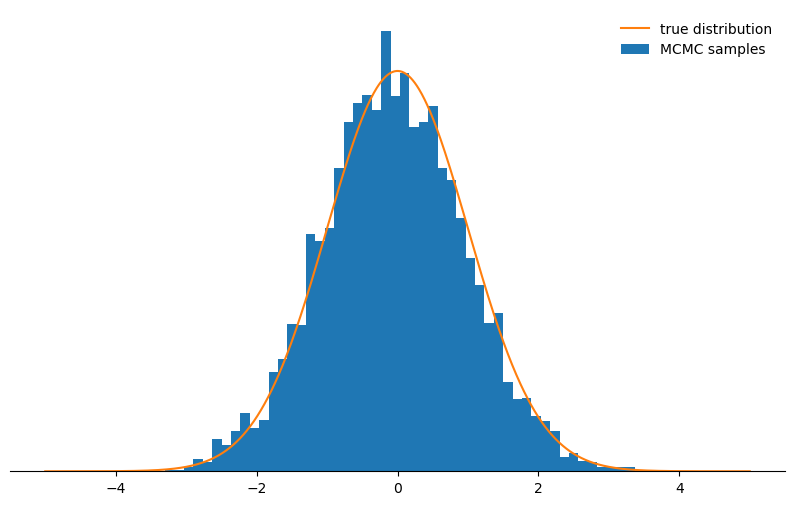

In [60]:
def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)
    
fig, ax = plt.subplots()
plot_samples(chain[500:], log_prob, ax)
despine(ax)
ax.set_yticks(())
plt.show()

Looks great!

Now, what's up with the parameters `stepsize` and `n_total`?
We'll discuss the step size first: it determines how far away a proposal state can be from the current state of the chain. It is thus a parameter of the proposal distribution $q$ and controls how big the random steps are which the Markov chain takes. If the step size is too large, the proposal state will often be in the tails of the distribution, where probability is low.
The Metropolis-Hastings sampler rejects most of these moves, meaning that the acceptance rate decreases and convergence is much slower.
See for yourself:

Acceptance rate: 0.105


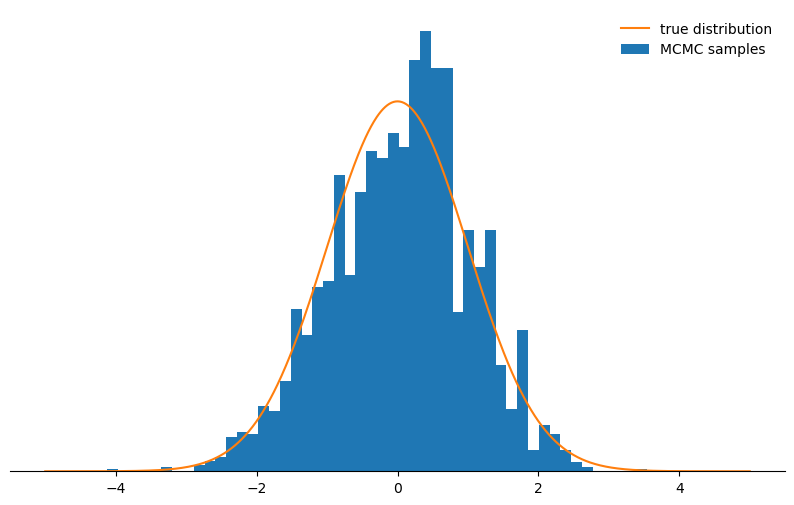

In [62]:
def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    despine(ax)
    ax.set_yticks(())
    plt.show()
    
sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)

Not as cool, right?
Now you could think the best thing to do is do choose a tiny step size.
Turns out that this is not too smart either because then the Markov chain will explore the probability distribution only very slowly and thus again won't converge as rapidly as with a well-adjusted step size:

Acceptance rate: 0.983


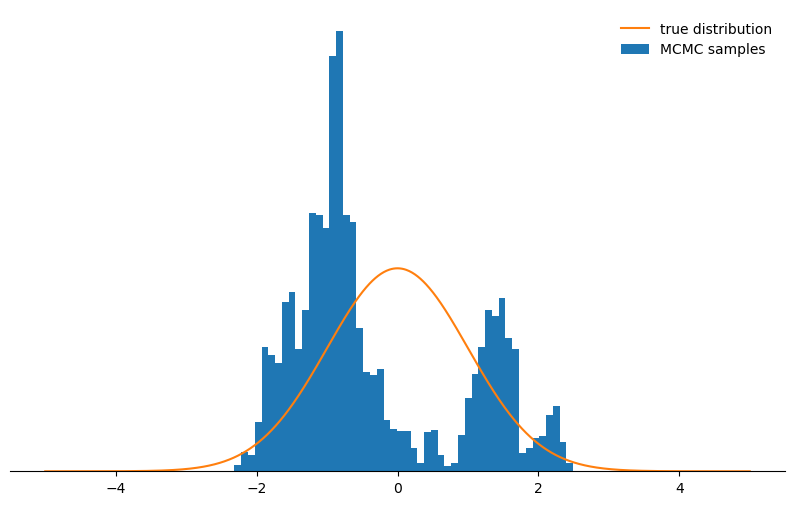

In [63]:
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

No matter how you choose the step size parameter, the Markov chain will eventually converge to its stationary distribution.
But it may take a looooong time.
The time we simulate the Markov chain for is set by the `n_total` parameter - it simply determines how many states of the Markov chain (and thus samples) we'll end up with.
If the chain converges slowly, we need to increase `n_total` in order to give the Markov chain enough time to forget it's initial state.
So let's keep the tiny step size and increase the number of samples by increasing `n_total`:

Acceptance rate: 0.991


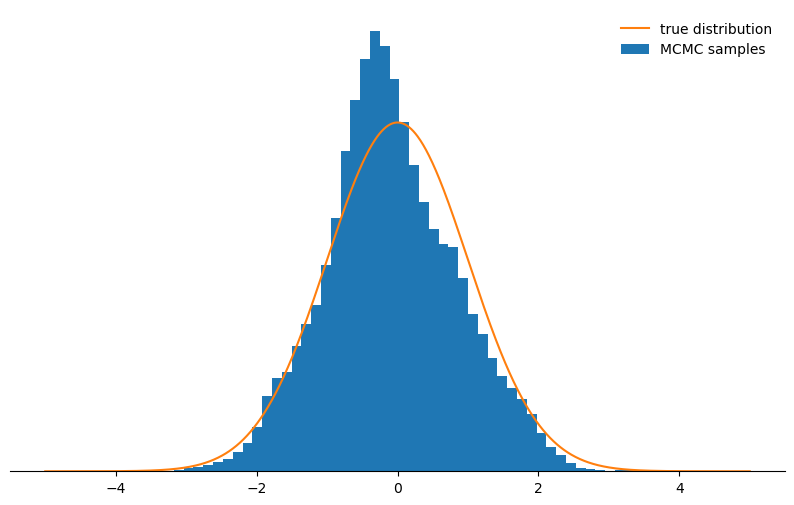

In [64]:
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)

Sloooowly getting there...

## Conclusions

With these considerations, I conclude the first blog post of this series.
I hope you now understand the intuition behind the Metropolis-Hastings algorithm, its parameters and why it is an extremely useful tool to sample from non-standard probability distributions you might encounter out there in the wild.  

I highly encourage you to play around with the code in this notebook - this way, you can learn how the algorithm behaves in various circumstances and deepen your understanding of it.
Go ahead and try out a non-symmetric proposal distribution!
What happens if you don't adjust the acceptance criterion accordingly?
What happens if you try to sample from a bimodal distribution?
Can you think of a way to automatically tune the stepsize?
What are pitfalls here?
Try out and discover yourself!  

In my next post, I will discuss the Gibbs sampler - a special case of the Metropolis-Hastings algorithm that allows you to approximately sample from a multivariate distribution by sampling from the conditional distributions.

Thanks for reading&mdash;go forward and sample!

# Introduction to MCMC, Part II: Gibbs sampling

In the [first blog post](https://www.tweag.io/posts/2019-10-25-mcmc-intro1.html) of this series, we discussed Markov chains and the most elementary [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) method, the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), and used it to sample from a univariate distribution.
In this episode, we discuss another famous MCMC sampling algorithm: the [Gibbs sampler](https://en.wikipedia.org/wiki/Gibbs_sampling).
It is very useful to sample from multivariate distributions:
it reduces the complex problem of sampling from a joint distribution to sampling from the full conditional (meaning, conditioned on all other variables) distribution of each variable. 
That means that to sample from, say, $p(x,y)$, it is sufficient to be able to sample from $p(x|y)$ and $p(y|x)$, which might be considerably easier.
The problem of sampling from multivariate distributions often arises in Bayesian statistics, where inference of likely values for a parameter often entails sampling not only that parameter, but also additional parameters required by the statistical model.

## Motivation
Why would splitting up sampling in this way be preferable?
Well, it might turn the problem of **sampling from one untractable joint distribution into sampling from several well-known**, tractable distributions.
If the latter (now conditional) distributions are still not tractable, at least you now can **use different and well-suited samplers for each of them instead of sampling all variables with a one-size-fits-all sampler**.
Take, for example, a bivariate normal distribution with density $p(x,y)$ that has very different variances for each variable:

In [76]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

np.random.seed(42)

def log_gaussian(x, mu, sigma):
    # The np.sum() is for compatibility with sample_MH
    return - 0.5 * np.sum((x - mu) ** 2) / sigma ** 2 \
           - np.log(np.sqrt(2 * np.pi * sigma ** 2))


class BivariateNormal(object):
    n_variates = 2
    
    def __init__(self, mu1, mu2, sigma1, sigma2):
        self.mu1, self.mu2 = mu1, mu2
        self.sigma1, self.sigma2 = sigma1, sigma2
        
    def log_p_x(self, x):
        return log_gaussian(x, self.mu1, self.sigma1)
        
    def log_p_y(self, x):
        return log_gaussian(x, self.mu2, self.sigma2)
    
    def log_prob(self, x):        
        cov_matrix = np.array([[self.sigma1 ** 2, 0],
                               [0, self.sigma2 ** 2]])
        inv_cov_matrix = np.linalg.inv(cov_matrix)
        kernel = -0.5 * (x - self.mu1) @ inv_cov_matrix @ (x - self.mu2).T
        normalization = np.log(np.sqrt((2 * np.pi) ** self.n_variates * np.linalg.det(cov_matrix)))
        
        return kernel - normalization               

    
bivariate_normal = BivariateNormal(mu1=0.0, mu2=0.0, sigma1=1.0, sigma2=0.15)

The `@` is a recent-ish addition to Python and denotes the matrix multiplication operator.
Let's plot this density:

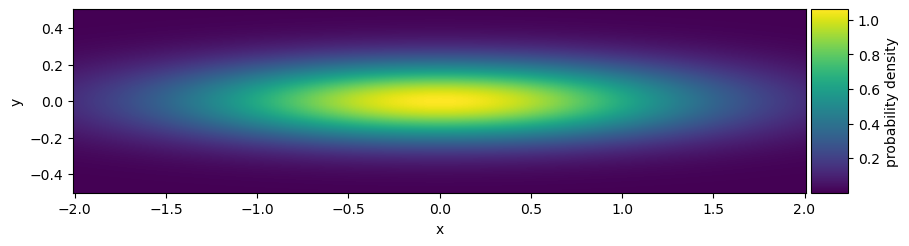

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
xses = np.linspace(-2, 2, 200)
yses = np.linspace(-0.5, 0.5, 200)
log_density_values = [[bivariate_normal.log_prob(np.array((x, y))) for x in xses] for y in yses]
dx = (xses[1] - xses[0]) / 2
dy = (yses[1] - yses[0]) / 2
extent = [xses[0] - dx, xses[-1] + dx, yses[0] - dy, yses[-1] + dy]
im = ax.imshow(np.exp(log_density_values), extent=extent)
ax.set_xlabel('x')
ax.set_ylabel('y')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(im, cax=cax)
cb.set_label('probability density')
plt.show()

Now you can try to sample from this using the previously discussed Metropolis-Hastings algorithm with a uniform proposal distribution.
Remember that in Metropolis-Hastings, a Markov chain is built by jumping a certain distance ("step size") away from the current state, and accepting or rejecting the new state according to an acceptance probability.
A small step size will explore the possible values for \\(x\\) very slowly, while a large step size will have very poor acceptance rates for \\(y\\).
The Gibbs sampler allows us to use separate Metropolis-Hastings samplers for $x$ and $y$ - each with an appropriate step size.
Note that we could also choose a bivariate proposal distribution in the Metropolis-Hastings algorithm such that its variance in $x$-direction is larger than its variance in the $y$-direction, but let's stick to this example for didactic purposes.

##  The systematic scan Gibbs sampler 
So how does Gibbs sampling work?
The basic idea is that given the joint distribution $p(x, y)$ and a state $(x_i, y_i)$ from that distribution, you obtain a new state as follows:
first, you sample a new value for one variable, say, $x_{i+1}$, from its distribution conditioned on $y_i$, that is, from $p(x|y_i)$. Then, you sample a new state for the second variable, $y_{i+1}$, from its distribution conditioned on the previously drawn state for $x$, that is, from $p(y|x_{i+1})$.
This two-step procedure can be summarized as follows: 
$$
\begin{align} x_{i+1} \sim& \ p(x|y_i) \\
              y_{i+1} \sim& \ p(y|x_{i+1})
\end{align}
$$
This is then iterated to build up the Markov chain.
For more than two variables, the procedure is analogous: you pick a fixed ordering and draw one variable after the other, each conditioned on, in general, a mix of old and new values for all other variables.[^1]
Fixing an ordering, like this, is called a _systematic scan_, an alternative is the _random scan_ where we'd randomly pick a new ordering at each iteration.

Implementing this Gibbs sampler for the above example is extremely simple, because the two variables are independent ($p(x|y)=p(x)$ and $p(y|x)=p(y)$).
We sample each of them with a Metropolis-Hastings sampler, implemented in the <a href="https://www.tweag.io/posts/2019-10-25-mcmc-intro1.html">first blog post</a> as the `sample_MH` function.
As a reminder, that function takes as arguments, in that order,
- the old state of a Markov chain (a one-dimensional `numpy` array),
- a function returning the logarithm of the probability density function (PDF) to sample from, 
- a real number representing the step size for the uniform proposal distribution, from which a new state is proposed. 

We then use `sample_MH` in the following, short function which implements the **systematic scan Gibbs sampler**:

In [79]:
def sample_gibbs(old_state, bivariate_dist, stepsizes):
    """Draws a single sample using the systematic Gibbs sampling
    transition kernel
    
    Arguments:
    - old_state: the old (two-dimensional) state of a Markov chain
                 (a list containing two floats)
    - bivariate_dist: an object representing a bivariate distribution
                      (in our case, an instance of BivariateNormal)
    - stepsizes: a list of step sizes
    
    """
    x_old, y_old = old_state
    
    # for compatibility with sample_MH, change floats to one-dimensional
    # numpy arrays of length one
    x_old = np.array([x_old])
    y_old = np.array([y_old])
    
    # draw new x conditioned on y
    p_x_y = bivariate_dist.log_p_x
    accept_x, x_new = sample_MH(x_old, p_x_y, stepsizes[0])
    
    # draw new y conditioned on x
    p_y_x = bivariate_dist.log_p_y
    accept_y, y_new = sample_MH(y_old, p_y_x, stepsizes[1])
    
    # Don't forget to turn the one-dimensional numpy arrays x_new, y_new
    # of length one back into floats
    
    return (accept_x, accept_y), (x_new[0], y_new[0])

The `sample_gibbs` function will yield one single sample from `bivariate_normal`.
As we did in the previous blog post for the Metropolis-Hastings algorithm, we now write a function that repeatedly runs `sample_gibbs` to build up a Markov chain and call it:

In [83]:
def build_gibbs_chain(init, stepsizes, n_total, bivariate_dist):
    """Builds a Markov chain by performing repeated transitions using
    the systematic Gibbs sampling transition kernel
    
    Arguments:
    - init: an initial (two-dimensional) state for the Markov chain
            (a list containing two floats)
    - stepsizes: a list of step sizes of type float
    - n_total: the total length of the Markov chain
    - bivariate_dist: an object representing a bivariate distribution
                      (in our case, an instance of BivariateNormal)
    
    """
    init_x, init_k = init
    chain = [init]
    acceptances = []
    
    for _ in range(n_total):
        accept, new_state = sample_gibbs(chain[-1], bivariate_dist, stepsizes)
        chain.append(new_state)        
        acceptances.append(accept)
    
    acceptance_rates = np.mean(acceptances, 0)
    print("Acceptance rates: x: {:.3f}, y: {:.3f}".format(acceptance_rates[0],
                                                          acceptance_rates[1]))
    #print(acceptances)
    return chain 

stepsizes = (6.5, 1.0)
initial_state = [2.0, -1.0]
chain = build_gibbs_chain(initial_state, stepsizes, 100000, bivariate_normal)
chain = np.array(chain)

Acceptance rates: x: 0.463, y: 0.455


<font color=red>**why the acceptance rate is not 1 ... which**</font>
$$
\begin{aligned}
& q\left(x^{\prime} \mid x_t\right)=\delta\left(x_{\backslash i}^{\prime}-x_{t, \backslash i}\right) p\left(x_i^{\prime} \mid x_{t, \backslash i}\right) \\
& p\left(x^{\prime}\right)=p\left(x_i^{\prime} \mid x_{\backslash}^{\prime}\right) p\left(x_{\backslash i}^{\prime}\right)=p\left(x_i^{\prime} \mid x_{t, \backslash i}\right) p\left(x_{t, \backslash i}\right) \\
& \text { acceptance rate: } \\
& a=\frac{p\left(x^{\prime}\right)}{p\left(x_t\right)} \cdot \frac{q\left(x_t \mid x^{\prime}\right)}{q\left(x^{\prime} \mid x_t\right)} \quad=\frac{p\left(x_i^{\prime} \mid x_{t, \backslash i}\right) p\left(x_{t, \backslash i}\right)}{p\left(x_{t i} \mid x_{t, \backslash i}\right) p\left(x_{t, \backslash i}\right)} \cdot \frac{q\left(x_t \mid x^{\prime}\right)}{\delta\left(x_{\backslash i}^{\prime}-x_{t, \backslash i}\right) p\left(x_i^{\prime} \mid x_{t, \backslash i}\right)} \\
& =\frac{q\left(x_t \mid x^{\prime}\right)}{p\left(x_{t i} \mid x_{t, \backslash i}\right) \delta\left(x_{\backslash i}^{\prime}-x_{t, \backslash i}\right)} \quad=1 \\
&
\end{aligned}
$$

Tada! 
We used two very different step sizes and achieved very similar acceptance rates with both.  
We now plot a 2D histogram of the samples (with the estimated probability density color-coded) and the marginal distributions:

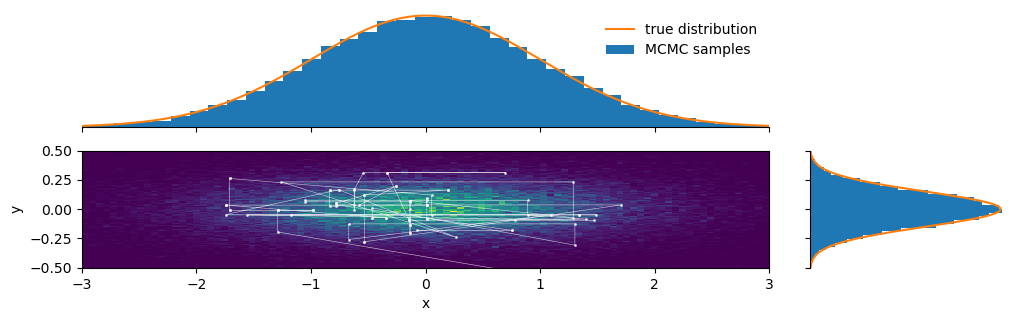

In [81]:
def plot_samples_2D(chain, path_length, burnin, ax, xlims=(-3, 3), ylims=(-0.5, 0.5)):
    chain = np.array(chain)
    bins = [np.linspace(xlims[0], xlims[1], 100), np.linspace(ylims[0], ylims[1], 100)]
    ax.hist2d(*chain[burnin:].T, bins=bins)
    ax.plot(*chain[:path_length].T, marker='o', c='w', lw=0.4, 
            markersize=1, alpha=0.75)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    
def plot_bivariate_samples(chain, burnin, pdf):
    fig = plt.figure(figsize=(12,7))
   
    ax_c = plt.subplot2grid((4, 4), (1, 0), rowspan=1, colspan=3)
    plot_samples_2D(chain, 100, burnin, ax_c)
    
    ax_t = plt.subplot2grid((4, 4), (0, 0), rowspan=1, colspan=3, sharex=ax_c)
    plot_samples(chain[:,0], pdf.log_p_x, ax_t, normalize=False)
    plt.setp(ax_t.get_xticklabels(), visible=False)
    ax_t.set_yticks(())
    for spine in ('top', 'left', 'right'):
        ax_t.spines[spine].set_visible(False)

    ax_r = plt.subplot2grid((4, 4), (1, 3), rowspan=1, colspan=1, sharey=ax_c)
    plot_samples(chain[:,1], pdf.log_p_y, ax_r, orientation='horizontal',
                 normalize=False, legend=False)
    plt.setp(ax_r.get_yticklabels(), visible=False)
    ax_r.set_xticks(())
    for spine in ('top', 'bottom', 'right'):
        ax_r.spines[spine].set_visible(False)

    plt.show()
    
plot_bivariate_samples(chain, burnin=200, pdf=bivariate_normal)

Looking at the path the Markov chain takes, we see several horizontal and vertical lines.
These are Gibbs sampling steps in which only one of the Metropolis-Hastings moves was accepted.

## A more complex example
The previous example was rather trivial in the sense that both variables were independent.
Let's discuss a more interesting example, which features both a discrete and a continuous variable.
We consider a mixture of two normal densities $p_\mathcal{N}(x; \mu, \sigma)$ with relative weights $w_1$ and $w_2$.
The PDF we want to sample from is then
$$
p(x) = w_1p_\mathcal{N}(x; \mu_1, \sigma_1) + w_2p_\mathcal{N}(x; \mu_2, \sigma_2) \ \mbox .
$$
This probability density is just a weighted sum of normal densities.
Let's consider a concrete example, choosing the following mixture parameters:

In [84]:
mix_params = dict(mu1=1.0, mu2=2.0, sigma1=0.5, sigma2=0.2, w1=0.3, w2=0.7)

How does it look like?
Well, it's a superposition of two normal distributions:

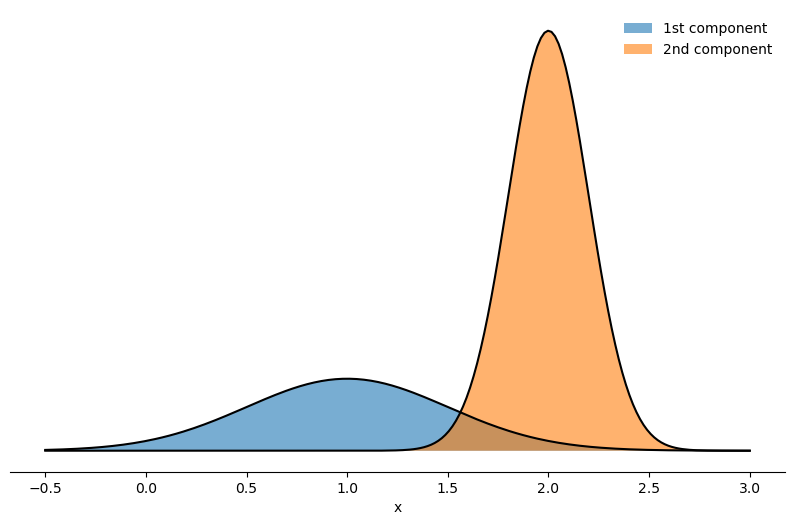

In [85]:
fig, ax = plt.subplots()
xspace = np.linspace(-0.5, 3, 200)

# densities of both components
first_component = [np.exp(log_gaussian(x, mix_params['mu1'], mix_params['sigma1']))
                   for x in xspace]
second_component = [np.exp(log_gaussian(x, mix_params['mu2'], mix_params['sigma2']))
                    for x in xspace]

# apply component weights
first_component = mix_params['w1'] * np.array(first_component)
second_component = mix_params['w2'] * np.array(second_component)

ax.plot(xspace, first_component, color='black')
ax.fill_between(xspace, first_component, alpha=0.6, label="1st component")
ax.plot(xspace, second_component, color='black')
ax.fill_between(xspace, second_component, alpha=0.6, label="2nd component")
ax.set_xlabel('x')
ax.set_yticks(())
ax.legend(frameon=False)
for spine in ('top', 'left', 'right'):
    ax.spines[spine].set_visible(False)
plt.show()

Inspired by this figure, we can also make the mixture nature of that density more explicit by introducing an additional integer variable $ k \in \{1,2\} $ which enumerates the mixture components. -- **In GMM the K is unknown,and is a hidden/latent varible** 

This will allow us to highlight several features and properties of the Gibbs sampler and to introduce an important term in probability theory along the way.
Having introduced a second variable means that we can consider several probability distributions: 

- $p(x,k)$: the joint distribution of $x$ and $k$ tells us how probable it is to find a value for $x$ and a value for $k$ "at the same time" and is given by
$$
p(x,k) = w_kp_\mathcal{N}(x; \mu_k, \sigma_k) \ \mbox .
$$
- $p(x|k)$: the conditional distribution of $x$ given $k$ tells us the probability of $x$ for a certain $k$. For example, if $k=1$, what is $p(x|k)$? Setting $k=1$ means we're considering only the first mixture component, which is a normal distribution with mean $\mu_1$ and standard deviation $\sigma_1$ and thus $p(x|k=1)=p_\mathcal{N}(x; \mu_1, \sigma_1)$. In general we then have
$$
p(x|k) = p_\mathcal{N}(x; \mu_k, \sigma_k) \ \mbox .
$$
- $p(k|x)$: assuming a certain value $x$, this probability distribution tells us for each $k$ the probability with which you would draw $x$ from the mixture component with index $k$. This probability is non-trivial, as the mixture components overlap and each $x$ thus has a non-zero probability in each component. But [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) saves us and yields
$$
p(k|x) = \frac{p(x|k) p(k)}{p(x)} \ \mbox .
$$
- **<font color=red>$p(k)$: this is the probability of choosing a mixture component $k$ irrespective of $x$ and is given by the mixture weights $w_k$.**</font>

The probability distributions $p(x)$ and $p(k)$ are related to the joint distribution $p(x,k)$ by a procedure called [*marginalization*](https://en.wikipedia.org/wiki/Marginal_distribution).
We marginalize $p(x,k)$ over, say, $k$, when we are only interested in the probability of $x$, independent of a specific value for $k$.
That means that the probability of $x$ is the sum of the probability of $x$ when $k=1$ plus the probability of $x$ when $k=2$, or, formally,
$$
p(x)=\sum_{ k \in \{1, 2\} } p(x,k) \ \mbox .
$$

With these probability distributions, we have all the required ingredients for setting up a Gibbs sampler.
We can then sample from $p(x,k)$ and reconstruct $p(x)$ by marginalization.
As marginalization means "not looking a variable", obtaining samples from $p(x)$ given samples from $p(x,k)$ just amounts to discarding the sampled values for $k$.

Let's first implement a Gaussian mixture with these conditional distributions:

In [86]:
class GaussianMixture(object):
    
    def __init__(self, mu1, mu2, sigma1, sigma2, w1, w2):
        self.mu1, self.mu2 = mu1, mu2
        self.sigma1, self.sigma2 = sigma1, sigma2
        self.w1, self.w2 = w1, w2
        
    def log_prob(self, x):
        return np.logaddexp(np.log(self.w1) + log_gaussian(x, self.mu1, self.sigma1),
                            np.log(self.w2) + log_gaussian(x, self.mu2, self.sigma2))
    
    def log_p_x_k(self, x, k):
        # logarithm of p(x|k)
        mu = (self.mu1, self.mu2)[k]
        sigma = (self.sigma1, self.sigma2)[k]
    
        return log_gaussian(x, mu, sigma)
    
    def p_k_x(self, k, x):
        # p(k|x) using Bayes' theorem
        mu = (self.mu1, self.mu2)[k]
        sigma = (self.sigma1, self.sigma2)[k]
        weight = (self.w1, self.w2)[k]
        log_normalization = self.log_prob(x)

        return np.exp(log_gaussian(x, mu, sigma) + np.log(weight) - log_normalization)

The interesting point here (and, in fact, the reason I chose this example) is that $p(x|k)$ is a probability density for a **continuous** variable $x$, while $p(k|x)$ is a probability distribution for a **discrete** variable. This means we will have to choose two very different sampling methods.
While we could just use a built-in `numpy` function to draw from the normal distributions $p(x|k)$, we will use Metropolis-Hastings.
The freedom to do this really demonstrates the flexibility we have in choosing samplers for the conditional distributions.

So we need to reimplement `sample_gibbs` and `build_gibbs_chain`, whose arguments are very similar to the previous implementation, but with a slight difference: the states now consist of a float for the continuous variabe and an integer for the mixture component, and **instead of a list of stepsizes we just need one single stepsize, as we have only one variable to be sampled with Metropolis-Hastings.**

In [95]:
def sample_gibbs(old_state, mixture, stepsize):
    """Draws a single sample using the systematic Gibbs sampling
    transition kernel
    
    Arguments:
    - old_state: the old (two-dimensional) state of a Markov chain
                 (a list containing a float and an integer representing 
                 the initial mixture component)
    - mixture: an object representing a mixture of densities
               (in our case, an instance of GaussianMixture)
    - stepsize: a step size of type float 
    
    """
    x_old, k_old = old_state
    
    # for compatibility with sample_MH, change floats to one-dimensional
    # numpy arrays of length one
    x_old = np.array([x_old])
    
    # draw new x conditioned on k
    x_pdf = lambda x: mixture.log_p_x_k(x, k_old)
    accept, x_new = sample_MH(x_old, x_pdf, stepsize)
    
    # ... turn the one-dimensional numpy arrays of length one back
    # into floats
    x_new = x_new[0]
    
    # draw new k conditioned on x , just draw based on k_probabilities
    k_probabilities = (mixture.p_k_x(0, x_new), mixture.p_k_x(1, x_new))
    #print(k_probabilities)
    jump_probability = k_probabilities[1 - k_old]
    #print(jump_probability)
    k_new = np.random.choice((0,1), p=k_probabilities)
    #print(k_new)
    return accept, jump_probability, (x_new, k_new)


def build_gibbs_chain(init, stepsize, n_total, mixture):
    """Builds a Markov chain by performing repeated transitions using
    the systematic Gibbs sampling transition kernel
    
    Arguments:
    - init: an initial (two-dimensional) state of a Markov chain
            (a list containing a one-dimensional numpy array
            of length one and an integer representing the initial
            mixture component)
    - stepsize: a step size of type float
    - n_total: the total length of the Markov chain
    - mixture: an object representing a mixture of densities
               (in our case, an instance of GaussianMixture)
    
    """
    init_x, init_k = init
    chain = [init]
    acceptances = []
    jump_probabilities = []
    
    for _ in range(n_total):
        accept, jump_probability, new_state = sample_gibbs(chain[-1], mixture, stepsize)
        chain.append(new_state)
        jump_probabilities.append(jump_probability)
        acceptances.append(accept)
    
    acceptance_rates = np.mean(acceptances)
    print("Acceptance rate: x: {:.3f}".format(acceptance_rates))
    print("Average probability to change mode: {}".format(np.mean(jump_probabilities)))
    
    return chain

mixture = GaussianMixture(**mix_params)
stepsize = 1.0
initial_state = [2.0, 1]
chain = build_gibbs_chain(initial_state, stepsize, 10000, mixture)
burnin = 1000
x_states = [state[0] for state in chain[burnin:]]

Acceptance rate: x: 0.623
Average probability to change mode: 0.07858658930962827


Plotting a histogram of our samples shows that the Gibbs sampler correctly reproduces the desired Gaussian mixture: 

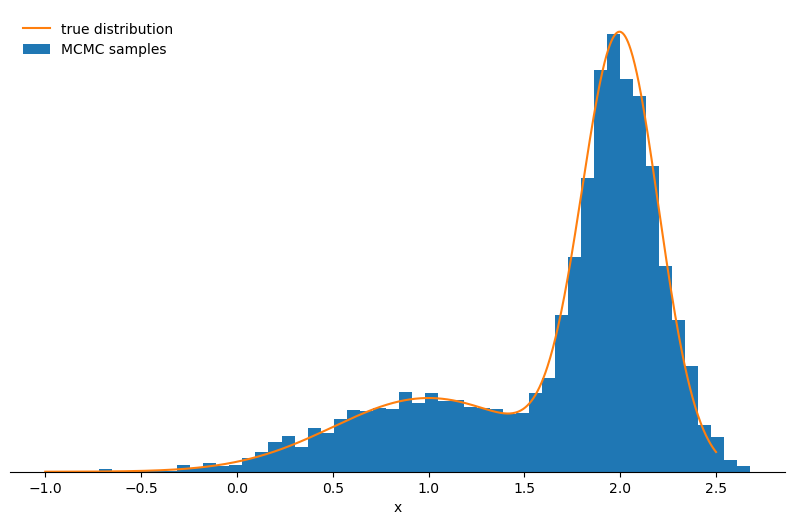

In [96]:
fig, ax = plt.subplots()
plot_samples(x_states, mixture.log_prob, ax, normalize=False, xlims=(-1,2.5))
for spine in ('top', 'left', 'right'):
    ax.spines[spine].set_visible(False)
ax.set_yticks(())
ax.set_xlabel('x')
plt.show()

([*this words is unclear to me what exactly means, I guess author try to say how to jump from one componet to anther component etc, but if probability is low then jumping might stucked for the low probability etc*](#zphilip48-1))You might wonder why we're also printing the average probability for the chain to sample from the component it is currently *not* in.

If this probability is very low, the Markov chain will get stuck for some time in the current mode and thus will have difficulties exploring the distribution rapidly. 
The quantity of interest here is $p(k|x)$: 
it is the probability of a certain component $k$ given a certain value $x$ and can be very low if the components are more separated and $x$ is more likely to be in the component which is not $k$. 
Let's explore this behavior by increasing the separation between the means of the mixture components:

In [100]:
mix_params

{'mu1': 1.0, 'mu2': 2.0, 'sigma1': 0.5, 'sigma2': 0.2, 'w1': 0.3, 'w2': 0.7}

In [101]:
mixture = GaussianMixture(mu1=-1.0, mu2=2.0, sigma1=0.5, sigma2=0.2, w1=0.3, w2=0.7)
stepsize = 1.0
initial_state = [2.0, 1]
chain = build_gibbs_chain(initial_state, stepsize, 100000, mixture)
burnin = 10000
x_states = [state[0] for state in chain[burnin:]]

Acceptance rate: x: 0.555
Average probability to change mode: 2.8224059844723072e-06


Let's plot the samples and the true distribution and see how the Gibbs sampler performs in this case:

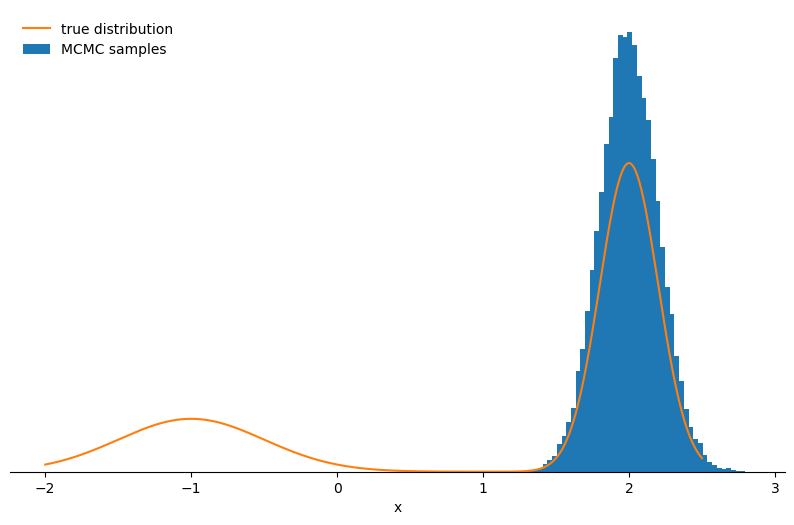

In [102]:
fig, ax = plt.subplots()
plot_samples(x_states, mixture.log_prob, ax, normalize=False, xlims=(-2,2.5))
for spine in ('top', 'left', 'right'):
    ax.spines[spine].set_visible(False)
ax.set_yticks(())
ax.set_xlabel('x')
plt.show()

You should see the probability decrease significantly and perhaps one of the modes being strongly over- and the other undersampled. 
The lesson here is that the Gibbs sampler might produce highly correlated samples.
Again&mdash;in the limit of many, many samples&mdash;the Gibbs sampler will reproduce the correct distribution, but you might have to wait a long time.

## Conclusions
By now, I hope you have a basic understanding of why Gibbs sampling is an important MCMC technique, how it works and why it can produce highly correlated samples.
I encourage you again to download the <a href="https://github.com/tweag/blog-resources/blob/master/mcmc-intro/mcmc_introduction.ipynb">full notebook</a> and play around with the code:
you could try using the `normal` function from the `numpy.random` module instead of Metropolis-Hastings in both examples or implement a *random* scan, in which the order in which you sample from the conditional distributions is chosen randomly. 

Or you could read about and implement the <a href="https://en.wikipedia.org/wiki/Gibbs_sampling#Collapsed_Gibbs_sampler">collapsed Gibbs sampler</a>, which allows you to perfectly sample the Gaussian mixture example by sampling from $p(k)$ instead of $p(k|x)$. 
Or you can just wait a little more for the next post in the series, which will be about Hybrid Monte Carlo (HMC), 
a fancy Metropolis-Hastings variant which takes into account the derivative of the log-probability of interest to propose better, less correlated, states!

## Footnotes
1. It's important to note, though, that the transition kernel given py the above procedure does _not_ define a detailed-balanced transition kernel for a Markov chain on the joint space of $x$ and $y$. One can show, though, that for each single variable, this procedure is a detailed-balanced transition kernel and the Gibbs sampler thus constitutes a composition of Metropolis-Hastings steps with acceptance probability 1. For details, see, for example, [this stats.stackexchange.com answer](https://stats.stackexchange.com/a/118453).

# Introduction to MCMC, part III: Hamiltonian Monte Carlo (TBS)

This is the third post of a series of blog posts about Markov Chain Monte Carlo (MCMC) techniques:

- [Part I: Metropolis-Hastings](https://www.tweag.io/posts/2019-10-25-mcmc-intro1.html)
- [Part II: Gibbs sampling](https://www.tweag.io/posts/2020-01-09-mcmc-intro2.html)

So far, we discussed two MCMC algorithms: the Metropolis-Hastings algorithm and the Gibbs sampler.
Both algorithms can produce highly correlated samples&mdash;Metropolis-Hastings has a pronounced random walk behaviour, while the Gibbs sampler can easily get trapped when variables are highly correlated.
In this blog post, we will take advantage of an additional piece of information about a distribution&mdash;its shape&mdash;and learn about Hamiltonian Monte Carlo, an algorithm [whose roots are in quantum physics](https://doi.org/10.1016%2F0370-2693%2887%2991197-X).

As always, you can [download the corresponding IPython notebook](https://github.com/tweag/blog-resources/blob/master/mcmc-intro/mcmc_introduction.ipynb) and play around with the code to your heart's desire!

## Physical intuition
As mentioned above, when doing Metropolis-Hastings sampling with a naive proposal distribution, we are essentially performing a random walk without taking into account any additional information we may have about the distribution we want to sample from. 
We can do better!<br>
If the density function we want to sample from is differentiable, we have access to its local shape through its *derivative*.
This derivative tells us, at each point $x$, how the value of the density $p(x)$ increases or decreases depending on how we change the $x$.
That means we should be able to use the derivative of $p(x)$ to propose states with high probabilities&mdash;which is exactly the key idea of Hamiltonian Monte Carlo (HMC).

The intuition behind HMC is that we can interpret a random walker as a particle moving under the effect of *forces* attracting it to higher-probability zones.
That is easier to see with an example: in the next image we show both a probability density $p(x)$ and its corresponding negative log-density $-\log p(x)$, which we will call the *potential energy* $E(x)$:

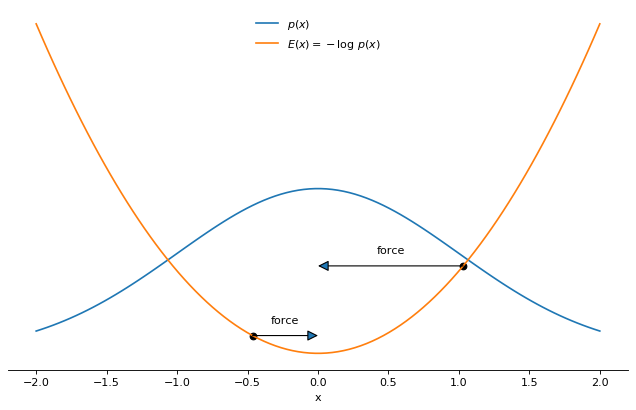

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

xspace = np.linspace(-2, 2, 100)
unnormalized_probs = np.exp(-0.5 * xspace ** 2)
energies = 0.5 * xspace ** 2

fig, ax = plt.subplots(dpi=80)
ax.plot(xspace, unnormalized_probs, label=r"$p(x)$")
ax.plot(xspace, energies, label=r"$E(x)=-\log\ p(x)$")
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
x_index1 = 75
ax.scatter((xspace[x_index1],), (energies[x_index1],), color="k")
a_start1 = np.array((xspace[x_index1], energies[x_index1]))
a_end1 = np.array((xspace[x_index1] - xspace[x_index1], energies[x_index1]))
ax.annotate("",a_end1, a_start1, arrowprops=prop)
text_pos1 = (a_start1[0] + 0.5 * (a_end1[0] - a_start1[0]), a_end1[1] + 0.075)
ax.text(*text_pos1, r"force", horizontalalignment="center")

x_index2 = 38
ax.scatter((xspace[x_index2],), (energies[x_index2],), color="k")
a_start2 = np.array((xspace[x_index2], energies[x_index2]))
a_end2 = np.array((xspace[x_index2] - xspace[x_index2], energies[x_index2]))
ax.annotate("",a_end2, a_start2, arrowprops=prop)
text_pos2 = (a_start2[0] + 0.5 * (a_end2[0] - a_start2[0]), a_end2[1] + 0.075, )
ax.text(*text_pos2, r"force", horizontalalignment="center")

ax.set_xlabel("x")
ax.set_yticks(())
for spine in ('top', 'right', 'left'):
    ax.spines[spine].set_visible(False)
ax.legend(frameon=False)
plt.show()

As you can see, the potential energy $E(x)$ looks like a mountainous landscape that attracts the particle (shown at two different positions) to its bottom&mdash;the steeper the landscape, the stronger will be the force pulling it towards the bottom.
What's more, the bottom of this landscape coincides with the region with the largest probability of $p(x)$!
That means that if we are able to predict where the particle will move to given its position and velocity, we can use the result of that prediction as a proposal state for a fancy version of Metropolis-Hastings.

This kind of prediction problem is very common and well-studied in physics&mdash;think of simulating the movement of planets around the sun, which is determined by gravitational forces.
We can thus borrow the well-known theory and methods from classical ("Hamiltonian") mechanics to implement our method!

While HMC is quite easy to implement, the theory behind it is actually far from trivial.
We will skip a lot of detail, but provide additional information on physics and numerics in detailed footnotes.

## The HMC algorithm

In physics, the force acting on a particle can be calculated as the derivative (or gradient) of a _potential energy_ $E(x)$. As said above, the negative log-density will play the role of that potential energy for us:
$$
E(x)=-\log p(x)
$$
Our particle does not only have a potential energy, but also a *kinetic* energy, which is the energy stored in its movement.
The kinetic energy depends on the particle's momentum&mdash;the product of its mass and velocity.
Since in HMC, the mass is often set to one, we will denote the momentum with the letter $v$ (for velocity), meaning that the kinetic energy is defined as$^1$

$$
K(v)=\frac{|v|^2}{2} \mathrm .
$$

Just as the position $x$, the momentum $v$ is generally a vector, whose length is denoted by $|v|$.
With these ingredients in place, we can then define the total energy of the particle as

$$
H(x,v)=K(v)+E(x) \mathrm .
$$

In classical physics, this quantity completely determines the movement of a particle.

HMC introduces the momentum of the particle as an auxiliary variable and samples the joint distribution of the particle's position and momentum.
Under some assumptions$^2$, this joint distribution is given by

$$
\begin{aligned}
p(x,v) &\propto \exp\{-H(x,v)\} \\ 
&= \exp\{-K(v)\} \times \exp\{-E(x)\} \\
&= \exp\left\{-\frac{|v|^2}{2}\right\} \times p(x)\mathrm .
\end{aligned}
$$

We can sample from $p(x,v)$ efficiently by means of an involved Metropolis-Hastings method:
starting from a current state $x$, we draw a random initial momentum $v$$^3$ (that "3" is a footnote) from a normal distribution and simulate the movement of the particle for some time to obtain a proposal state $x^*$.

When the simulation stops, the fictive particle has some position $x^*$ and some momentum $v^*$, which serve as our proposal states.
If we had a perfectly accurate simulation, the total energy $H(x,v)$ would remain the same and the final position would be a perfectly fine sample from the joint distribution.
Unfortunately, all numerical simulation is only approximative, and we have to account for errors.
As we have done before in the original Metropolis-Hastings algorithm, we can correct for the bias with a Metropolis criterion.$^4$
In our case, the acceptance probability is given by

$$
p_\mathrm{acc}^\mathrm{HMC} = \min\left\{1, \exp\{-[H(x^*, v^*) - H(x, v)]\} \right\} \mathrm .
$$

We are not interested in the momentum $v^*$: if the move is accepted, we only store the position $x^*$ as the next state of the Markov chain.

### Implementation
In terms of implementation, the only part of HMC that is not immediately obvious is the simulation of the particle's movement.
The simulation of the movement of the particle works by discretizing time into steps of a certain size.
Position and momentum of a particle are then updated in an alternating fashion.
In HMC, this is usually done as follows$^5$:

In [29]:
def leapfrog(x, v, gradient, timestep, trajectory_length):
    v -= 0.5 * timestep * gradient(x)
    for _ in range(trajectory_length - 1):
        x += timestep * v
        v -= timestep * gradient(x)
    x += timestep * v
    v -= 0.5 * timestep * gradient(x)

    return x, v

Now we already have all we need to proceed to the implementation of HMC!
Here it is:

In [30]:
def sample_HMC(x_old, log_prob, log_prob_gradient, timestep, trajectory_length):
    # switch to physics mode!
    def E(x): return -log_prob(x)
    def gradient(x): return -log_prob_gradient(x)
    def K(v): return 0.5 * np.sum(v ** 2)
    def H(x, v): return K(v) + E(x)

    # Metropolis acceptance probability, implemented in "logarithmic space"
    # for numerical stability:
    def log_p_acc(x_new, v_new, x_old, v_old):
        return min(0, -(H(x_new, v_new) - H(x_old, v_old)))

    # give a random kick to particle by drawing its momentum from p(v)
    v_old = np.random.normal(size=x_old.shape)

    # approximately calculate position x_new and momentum v_new after
    # time trajectory_length  * timestep
    x_new, v_new = leapfrog(x_old.copy(), v_old.copy(), gradient, 
                            timestep, trajectory_length)

    # accept / reject based on Metropolis criterion
    accept = np.log(np.random.random()) < log_p_acc(x_new, v_new, x_old, v_old)

    # we consider only the position x (meaning, we marginalize out v)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

And, analogously to the other MCMC algorithms we discussed before, here's a function to build up a Markov chain using HMC transitions:

In [31]:
def build_HMC_chain(init, timestep, trajectory_length, n_total, log_prob, gradient):
    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_HMC(chain[-1].copy(), log_prob, gradient,
                                   timestep, trajectory_length)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate

As an example, let's consider a two-dimensional Gaussian distribution.
Here is its log-probability, neglecting the normalization constant:

In [32]:
def log_prob(x): return -0.5 * np.sum(x ** 2)

Now we need to calculate the gradient of the log-probability. 
Its $i$-th component is given by $\frac{\partial}{\partial x^i} E(x)$, where $x^i$ is the $i$-th component of the variable vector $x$.
Doing the math, you'll end up with:

In [33]:
def log_prob_gradient(x): return -x

Now we're ready to test the HMC sampler:

In [34]:
chain, acceptance_rate = build_HMC_chain(np.array([5.0, 1.0]), 1.5, 10, 10000,
                                         log_prob, log_prob_gradient)
print("Acceptance rate: {:.3f}".format(acceptance_rate))


Acceptance rate: 0.622


To display the result, we plot a two-dimensional histogram of the sampled states and the first 200 states of the chain:

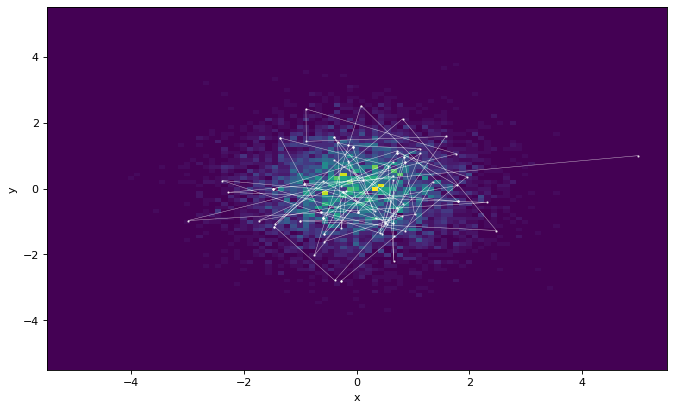

In [35]:
fig, ax = plt.subplots(dpi=80)
plot_samples_2D(chain, 100, 200, ax, xlims=(-5.5, 5.5), ylims=(-5.5, 5.5))
plt.show()

We see that the HMC states are indeed quite far away from each other&mdash;the Markov chain jumps relatively large distances.

How does Metropolis-Hastings do on the same distribution?
Let's have a look and run a Metropolis-Hastings sampler with the same initial state and a stepsize chosen such that a similar acceptance rate is achieved.

In [36]:
chain, acceptance_rate = build_MH_chain(np.array([5.0, 1.0]), 2.6, 10000, log_prob)
print("Acceptance rate: {:.3f}".format(acceptance_rate))

Acceptance rate: 0.623


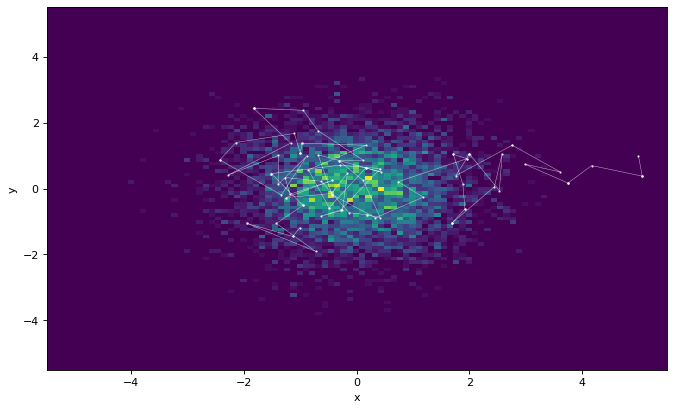

In [37]:
fig, ax = plt.subplots(dpi=80)
plot_samples_2D(chain, 100, 200, ax, xlims=(-5.5, 5.5), ylims=(-5.5, 5.5))
plt.show()

What you see is that Metropolis-Hastings takes a much longer time to actually find the relevant region of high probability and then explore it.
This means that, with a similar acceptance rate, HMC produces much less correlated samples and thus will need fewer steps to achieve the same sampling quality.


While this advantage is even more pronounced in higher dimensions, it doesn't come for free:
numerically approximating the equations of motions of our fictive particle takes up quite some computing power, especially if evaluating the log-probability gradient is expensive.

### Choosing the parameters
Two parameters effectively determine the distance of the proposal state to the current state: the integration time step and the number of steps to perform.<br>
Given a constant number of steps, the larger the integration time step, the further away from the current state the proposal will be.
But at the same time, larger time steps implies less accurate results, which means lower acceptance probabilities.<br>
The number of steps has a different impact:
given a fixed step size, the more steps performed, the less correlated the proposal will be to the current state.
There is a risk of the trajectory doubling back and wasting precious computation time, but
[NUTS](http://jmlr.org/papers/volume15/hoffman14a/hoffman14a.pdf), a neat variant of HMC which optimizes the number of integration steps, addresses exactly this problem.<br>
For a basic implementation of HMC, one can use a fixed number of integration steps and automatically adapt the timestep, targeting a reasonable acceptance rate (e.g. 50%) during a burn-in period.
The adapted timestep can then be used for the final sampling.

### Drawbacks
Unfortunately, there's no such thing as a free lunch.
While the big advantage of HMC, namely, less correlated samples with high acceptance rates, are even more pronounced in real-world applications than in our toy example, there are also some disadvantages.

First of all, you can only easily use HMC when you have continuous variables since the gradient of the log-probability for non-continuous variables is not defined.
You might still be able to use HMC if you have a mix of discrete and continuous variables by embedding HMC in a [Gibbs sampler](https://www.tweag.io/posts/2020-01-09-mcmc-intro2.html).
Another issue is that the gradient can be very tedious to calculate and its implementation error-prone.
Luckily, popular probabilistic programming packages (see below) which implement HMC as their main sampling workhorse, take advantage of [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation), which relieves the user from worrying about gradients.

Finally, as we just discussed, there are quite a few free parameters, the suboptimal tuning of which can severely decrease performance.
However, since HMC is a very popular algorithm, many implementations come with all sorts of useful heuristics to choose parameters, which makes HMC easy to profit from in spite of these drawbacks.

## Conclusion
I hope that at this point, you have a general understanding of the idea behind HMC and both its advantages and disadvantages.
HMC is still subject to active research and if you like what you just read (and have the required math / stats / physics skills), there are many more interesting things to learn.$^6$<br>
To test your understanding of HMC, here's a little brain teaser, which also invites you to play around with the code:
what would happen if you made a mistake in the gradient calculation or implementation?
The answer is: you still get a perfectly valid MCMC algorithm, but acceptance rate will decrease.
But why?

I would also like to point out that there are several great, accessible HMC resources out there. For example, a classic introduction is [MCMC using Hamiltionian dynamics](https://arxiv.org/pdf/1206.1901.pdf) and [these amazing visualizations](https://chi-feng.github.io/mcmc-demo/app.html) explain HMC and the influence of the parameters better than any words.

Whether you now decide to take a deep dive into HMC or you're just content to have finally learned what kind of magic is working under the hood of probabilistic programming packages such as [PyMC3](https://github.com/pymc-devs/pymc3), [Stan](https://mc-stan.org), and [Edward](http://edwardlib.org/)&mdash;stay tuned to not miss the last blog post in this series, which will be about Replica Exchange, a cool strategy to fight issues arising from multimodality!

## Footnotes
1. Although hidden here, in general, the kinetic energy of a physical object involves the mass of the object. It turns out that HMC even permits a different "mass" (measure of inertia) for each dimension, which can even be position-dependent. This can be exploited to tune the algorithm.

2. These assumptions are defined by the [canonical ensemble](https://en.wikipedia.org/wiki/Canonical_ensemble). In statistical mechanics, this defines a large, constant number of particles confined in a constant volume. The whole system is kept at a constant temperature.

3. The temperature of a system is closely related to the average kinetic energy of its constituent particles. Drawing a new momentum for every HMC step can be seen as a kind of thermostat, keeping the average kinetic energy and thus the temperature constant. It should be noted that there are also [HMC variants with only partial momentum refreshment](https://arxiv.org/abs/1205.1939), meaning that the previous momentum is retained, but with some additional randomness on top.

4. HMC combines two very different techniques, both very popular in computational physics: Metropolis-Hastings, which, in a sense, circumvents a real simulation of the physical system, and molecular dynamics, which explicitly solves equations of motion and thus simulates the system. Because of this, HMC is also known as (and was originally named) Hybrid Monte Carlo.

5. The movement of a classical particle follows a set of differential equations known as [Hamilton's equations of motion](https://en.wikipedia.org/wiki/Hamiltonian_mechanics). In the context of HMC, numerical methods to solve them have to maintain crucial properties of Hamiltonian mechanics: _reversibility_ assures that a trajectory can be run "backwards" by flipping the direction of the final momentum and is important for detailed balance. [_Volume conservation_](https://en.wikipedia.org/wiki/Liouville%27s_theorem_(Hamiltonian)) essentially keeps the acceptance criterion simple. In addition, [_symplecticity_](https://en.wikipedia.org/wiki/Symplectic_integrator) is highly advantageous: it implies volume conservation, but also guarantees that the energy error stays small and thus leads to high acceptance rates. We use [leapfrog integration](https://en.wikipedia.org/wiki/Leapfrog_integration), which  checks all these boxes and is the standard method used in HMC.

6. How about [using differential geometry to continuously optimize the mass](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-9868.2010.00765.x) or [viewing HMC in terms of operators acting on a discrete state space ladder](https://arxiv.org/abs/1409.5191)?


# Introduction to MCMC, Part IV:  Replica Exchange

This is part 4 of a series of blog posts about MCMC techniques:

- [The basics](https://www.tweag.io/blog/2019-10-25-mcmc-intro1/)
- [Gibbs sampling](https://www.tweag.io/blog/2020-01-09-mcmc-intro2/)
- [Hamiltonian Monte Carlo](https://www.tweag.io/blog/2020-08-06-mcmc-intro3/)

In the previous three posts, we covered both basic and more powerful Markov chain Monte Carlo (MCMC) techniques.
In case you are unfamiliar with MCMC:
it is a class of methods for sampling from probability distributions with unknown normalization constant and to make the most of this post, I would recommend to get acquainted with MCMC basics by, for example, reading the [first post](https://www.tweag.io/blog/2019-10-25-mcmc-intro1/) of this series.  
The algorithms we discussed previously already get you quite far in everyday problems and are implemented in probabilistic programming packages such as [PyMC3](https://github.com/pymc-devs/pymc3) or [Stan](https://mc-stan.org/).
In the (for now) final post of this series, we will leave behind the MCMC mainstream and discuss a technique to tackle highly multimodal sampling problems.

As we saw in the Gaussian mixture example in the [Gibbs sampling blog post](https://www.tweag.io/blog/2020-01-09-mcmc-intro2/), a Markov chain can have a hard time overcoming low-probability barriers in the limited time we are simulating it.
Such a stuck Markov chain thus samples a distribution incorrectly, because it oversamples some modes and undersamples others.  
A cool way to overcome this problem is to not simulate only from the distribution of interest, but also flatter versions ("replicas") of it, in which low-probability regions can be crossed more easily.
If we then occasionally exchange states between these flatter Markov chains and the Markov chain sampling the distribution of interest, the latter chain will eventually get unstuck, as incoming states from flatter distributions are more likely to be located in a different mode.
This is the principal idea of Replica Exchange (RE), also known as "Parallel Tempering" (PT) or "Metropolis Coupled Markov Chain Monte Carlo".

## Replica...

Just as several other MCMC algorithms, RE has its [origins](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.57.2607) in computational physics and just as before, we will help ourselves to some physics terminology.  
As discussed in [the previous blog post about Hamiltonian Monte Carlo](https://www.tweag.io/blog/2020-08-06-mcmc-intro3/), under [certain conditions](https://en.wikipedia.org/wiki/Canonical_ensemble), the probability for a physical system to be in a certain state $x$ is characterized by a potential energy $E(x)$ and given by $p(x)\propto\exp[-E(x)]$.
In fact, for simplicity, we omitted a little detail:
the system has a temperature $T$, which influences the probability of the state $x$ via a constant $\beta \propto \frac{1}{T}$.
The complete formula for the probability is then

$$
p_\beta(x) \propto \exp[-\beta E(x)] \ \mathrm .
$$

The temperature is important, as it essentially determines the "flatness" of the distribution $p_\beta(x)$.
In a high-temperature system (meaning $\beta \approx 0$), energy barriers can be easily crossed because $p_\beta(x)$ is almost uniform.
Physically speaking, because particles move very fast at high temperatures, they can overcome forces acting on them more easily.  
Therefore, parameterizing the distribution $p(x)$ by $\beta$ in the above way gives us exactly what we need for RE:
a family of distributions (replicas), which are increasingly flatter and thus easier to sample.
This family of distributions is given by $p_\beta(x)=p(x)^\beta$ with $1 \geq \beta \geq 0$ and $p_1(x)=p(x)$ being the distribution we're actually interested in.
We call the distributions with $\beta < 1$ "tempered".
Let's take up again the example of a Gaussian mixture and make some choice of inverse temperatures:

In [38]:
mix_params = dict(mu1=-1.5, mu2=2.0, sigma1=0.5, sigma2=0.2, w1=0.3, w2=0.7)
mixture = GaussianMixture(**mix_params)
temperatures = [0.1, 0.4, 0.6, 0.8, 1.0]

What do the tempered mixtures looks like? Let's plot them:

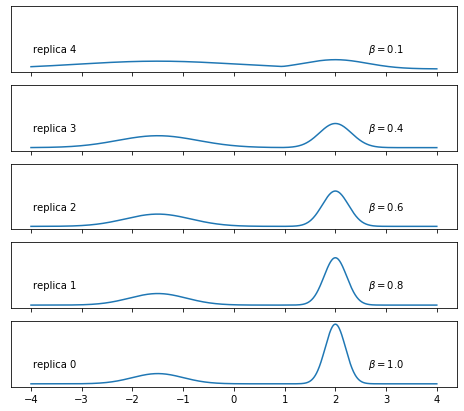

In [40]:
from scipy.integrate import quad

def plot_tempered_distributions(log_prob, temperatures, axes, xlim=(-4, 4)):
    xspace = np.linspace(*xlim, 1000)
    for i, (temp, ax) in enumerate(zip(temperatures, axes)):
        pdf = lambda x: np.exp(temp * log_prob(x))
        Z = quad(pdf, -1000, 1000)[0]
        ax.plot(xspace, np.array(list(map(pdf, xspace))) / Z)
        ax.text(0.8, 0.3, r'$\beta={}$'.format(temp), transform=ax.transAxes)
        ax.text(0.05, 0.3, 'replica {}'.format(len(temperatures) - i - 1), 
                transform=ax.transAxes)
        ax.set_yticks(())
    plt.show()
    
fig, axes = plt.subplots(len(temperatures), 1, sharex=True, sharey=True,
                        figsize=(8, 7))
plot_tempered_distributions(mixture.log_prob, temperatures, axes)
plt.show()

I believe that you'll agree that the upper distributions look somewhat easier to sample. Note, though, that this is not the only way to obtain a family of tempered distributions.

## ... Exchange

Now that we know how to obtain flatter replicas of our target density, let's work out the other key component of Replica Exchange &mdash; the exchanges between them.
Naively, you would probably do the following: if, after $k$ steps of sampling, the Markov chain $i$ is in state state $x^i_k$ and the Markov chain $j$ is in state $x^j_k$, then an exchange of states between the two chains leads to the next state of chain $i$ being in state $x^i_{k+1}=x^j_k$, while chain $j$ will assume $x^j_{k+1}=x^i_k$ as its next state.$^1$  
Of course you can't just swap states like that, because the exchanged states will not be drawn from the right distribution.
So what do we do if we have a proposal state which is not from the correct distribution?
The same thing we always do:
we use a Metropolis criterion to conditionally accept / reject it, thus making sure that the Markov chain's equilibrium distribution is maintained.
So the probability to accept the exchange is the probability to accept the new proposal state in chain $i$ ($p_{j\rightarrow i}$) times the probability to accept the new proposal state in chain $j$ ($p_{i\rightarrow j}$).
Here's the full expression for the exchange acceptance probability:

$$
p^\mathrm{RE}_\mathrm{acc} (x^i_{k+1}=x^j_k, x^j_{k+1}=x^i_k | x^i_k, x^j_k) = \mathrm{min}\Bigg\{1, \underbrace{\frac{p_{\beta_i}(x^j_k)}{p_{\beta_i}(x^i_k)}}_{p_{j\rightarrow i}} \times \underbrace{\frac{p_{\beta_j}(x^i_k)}{p_{\beta_j}(x^j_k)}}_{p_{i\rightarrow j}}\Bigg\}
$$

Some thought has to be put into how to choose the replica pairs for which exchanges are attempted.
Imagine having three replicas.
In a single exchange attempt, only two replicas, say, $2$ and $3$, are involved, while the target distribution, sampled by replica $1$, performs a regular, local MCMC move instead.
After attempting an exchange between replicas $2$ and $3$, all replicas would continue to sample locally for a while until it's time for the next exchange attempt.
If we chose again replicas $2$ and $3$ and kept on doing so, replica $1$ would not be "connected" to the other two replicas.
The following figure, in which each local MCMC sample is denoted by a dash and samples involved in an exchange are shown as solid dots shows how that would look like:
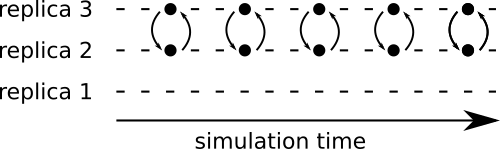
As the lower (target) replica doesn't participate in any exchanges, it would likely stay stuck in its current mode.
This strategy thus defeats the purpose of RE.
Only if we also attempt exchanges between replica $1$ and, for example, replica $2$, replica $1$ has access to states originally stemming from the high-temperature replica $3$.
That way, we make sure that all replicas are connected to each other.
We best swap only replicas adjacent in the temperature ladder, because acceptance rate will decrease if the distributions are too different.
That swapping strategy would look as follows:
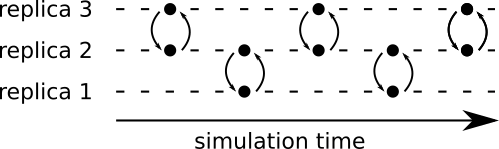
If a replica is not participating in a swap, we just draw a normal sample.
As it was the case for the tempered replicas, also the exchanges do not necessarily have to be performed in the way presented here:
there is a certain freedom in choosing the acceptance criterion as well as in the scheme to select swap partners.

## Implementation
Let's implement this:

In [47]:
def handle_left_border(leftmost_old_state, leftmost_temperature, 
                       leftmost_stepsize, log_prob, new_multistate):
    accepted, state = sample_MH(leftmost_old_state, 
                                lambda x: leftmost_temperature * log_prob(x), 
                                leftmost_stepsize)
    new_multistate = [state] + new_multistate
    return new_multistate, accepted


def handle_right_border(rightmost_old_state, rightmost_temperature, 
                        rightmost_stepsize, log_prob, new_multistate):
    accepted, state = sample_MH(rightmost_old_state, 
                                lambda x: rightmost_temperature * log_prob(x),
                                rightmost_stepsize)
    new_multistate = new_multistate + [state]
    return new_multistate, accepted
    
    
def build_RE_chain(init, stepsizes, n_total, temperatures, swap_interval, log_prob):

    from itertools import cycle

    n_replicas = len(temperatures)

    # a bunch of arrays in which we will store how many
    # Metropolis-Hastings / swap moves were accepted
    # and how many there were performed in total

    accepted_MH_moves = np.zeros(n_replicas)
    total_MH_moves = np.zeros(n_replicas)
    accepted_swap_moves = np.zeros(n_replicas - 1)
    total_swap_moves = np.zeros(n_replicas - 1)

    cycler = cycle((True, False))
    chain = [init]
    for k in range(n_total):
        new_multistate = []
        if k > 0 and k % swap_interval == 0:
            # perform RE swap
            # First, determine the swap partners
            if next(cycler):
                # swap (0,1), (2,3), ...
                partners = [(j-1, j) for j in range(1, n_replicas, 2)]
            else:
                # swap (1,2), (3,4), ...
                partners = [(j-1, j) for j in range(2, len(temperatures), 2)]
            # Now, for each pair of replicas, attempt an exchange
            for (i,j) in partners:
                bi, bj = temperatures[i], temperatures[j]
                lpi, lpj = log_prob(chain[-1][i]), log_prob(chain[-1][j])
                log_p_acc = min(0, bi * lpj - bi * lpi + bj * lpi - bj * lpj)
                if np.log(np.random.uniform()) < log_p_acc:
                    new_multistate += [chain[-1][j], chain[-1][i]]
                    accepted_swap_moves[i] += 1
                else:
                    new_multistate += [chain[-1][i], chain[-1][j]]
                total_swap_moves[i] += 1
            # We might have border cases: if left- / rightmost replicas don't participate
            # in swaps, have them draw a sample
            if partners[0][0] != 0:
                new_multistate, accepted = handle_left_border(chain[-1][0], temperatures[0],
                                                              stepsizes[0], log_prob,
                                                              new_multistate)
                accepted_MH_moves[0] += accepted
                total_MH_moves[0] += 1
            if partners[-1][1] != len(temperatures) - 1:
                new_multistate, accepted = handle_right_border(chain[-1][-1], temperatures[-1],
                                                               stepsizes[-1], log_prob,
                                                               new_multistate)
                accepted_MH_moves[-1] += accepted
                total_MH_moves[-1] += 1
        else:
            # perform sampling in single chains
            for j, temp in enumerate(temperatures):
                accepted, state = sample_MH(chain[-1][j], lambda x: temp * log_prob(x), stepsizes[j])
                accepted_MH_moves[j] += accepted
                total_MH_moves[j] += 1
                new_multistate.append(state)
        chain.append(new_multistate)

    # calculate acceptance rates
    MH_acceptance_rates = accepted_MH_moves / total_MH_moves
    # safe division in case of zero total swap moves
    swap_acceptance_rates = np.divide(accepted_swap_moves, total_swap_moves,
                                      out=np.zeros(n_replicas - 1), where=total_swap_moves != 0)

    return MH_acceptance_rates, swap_acceptance_rates, np.array(chain)

Before we can run this beast, we have to set stepsizes for all the single Metropolis-Hastings samplers:

In [48]:
stepsizes = [2.75, 2.5, 2.0, 1.75, 1.6]

Note that the step size decreases:
the more pronounced the modes are, the lower a step size you need to maintain a decent Metropolis-Hastings acceptance rate.  
Let's first run the three Metropolis-Hastings samplers independently by setting the `swap_interval` argument of the above function to something bigger than `n_total`, meaning that no swap will be attempted:

In [49]:
def print_MH_acceptance_rates(mh_acceptance_rates):
    print("MH acceptance rates: " + "".join(["{}: {:.3f} ".format(i, x)
                                             for i, x in enumerate(mh_acceptance_rates)]))


mh_acc_rates, swap_acc_rates, chains = build_RE_chain(np.random.uniform(low=-3, high=3,
                                                                        size=len(temperatures)),
                                                      stepsizes, 10000, temperatures, 500000000,
                                                      mixture.log_prob)
print_MH_acceptance_rates(mh_acc_rates)

MH acceptance rates: 0: 0.796 1: 0.542 2: 0.477 3: 0.700 4: 0.695 


Let's visualize the samples:

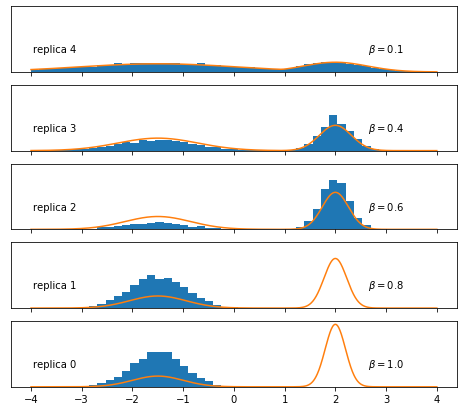

In [50]:
def plot_RE_samples(chains, axes, bins=np.linspace(-4, 4, 50)):
    for i, (chain, ax) in enumerate(zip(chains, axes)):
        ax.hist(chain, bins, density=True, label="MCMC samples")
        
fig, axes = plt.subplots(len(temperatures), 1, sharex=True, sharey=True,
                         figsize=(8, 7))
plot_RE_samples(chains[100:].T, axes)
plot_tempered_distributions(mixture.log_prob, temperatures, axes)
plt.show()

We find, as expected, that the replicas with lower inverse temperature are sampled much more exhaustively, while the Metropolis-Hastings sampler struggles for $\beta=1$ and perhaps already $\beta = 0.8$.  
Now we couple the chains by replacing every fifth Metropolis-Hastings step by an exchange step:

In [51]:
init = np.random.uniform(low=-4, high=4, size=len(temperatures))
mh_acc_rates, swap_acc_rates, chains = build_RE_chain(init, stepsizes,
                                                      10000, temperatures, 5,
                                                      mixture.log_prob)
print_MH_acceptance_rates(mh_acc_rates)
swap_rate_string = "".join(["{}<->{}: {:.3f}, ".format(i, i+1, x)
                            for i, x in enumerate(swap_acc_rates)])[:-2]
print("Swap acceptance rates:", swap_rate_string)

MH acceptance rates: 0: 0.788 1: 0.553 2: 0.522 3: 0.503 4: 0.474 
Swap acceptance rates: 0<->1: 0.563, 1<->2: 0.828, 2<->3: 0.838, 3<->4: 0.887


It looks like the temperatures we chose are (in this case, even more than) close enough to allow for good swap acceptance rates&mdash;a necessary condition for a RE simulation to be useful.  
Let's see whether the many accepted exchanges actually helped the Markov chain at $\beta=1$ to sample the target distribution exhaustively:

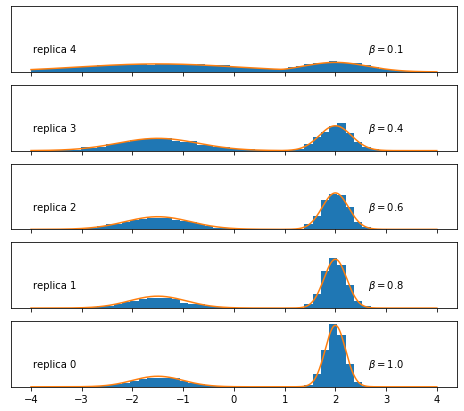

In [52]:
fig, axes = plt.subplots(len(temperatures), 1, sharex=True, sharey=True,
                        figsize=(8, 7))
plot_RE_samples(chains[100:].T, axes)
plot_tempered_distributions(mixture.log_prob, temperatures, axes)
plt.show()

Et voilà! Thanks to coupling the replicas, we manage to sample correctly even at $\beta=1$!

A nice way to think about what is happening in the course of a RE simulation is to look at what happens to the initial state of a replica.
The initial state will be evolved through some "local" sampling algorithms for a few steps until an exchange is attempted.
If the exchange is successful, the state moves up or down a step on the "temperature ladder" and is evolved on that step until at least the next attempted exchange.  
We can visualize that by first detecting, for each pair of replicas, at which simulation time points a successful swap occured and then reconstructing the movement of a state from the list of swaps.
This yields, for each initial state, a trajectory across the temperature ladder.
For clarity, we only plot the trajectories of the initial states of the target and the flattest replica:

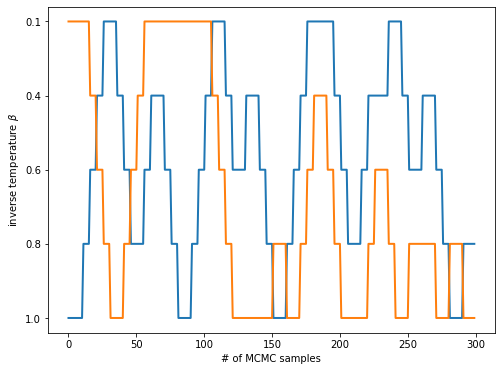

In [53]:
# Detect swaps. This method works only under the assumption that
# when performing local MCMC moves, starting from two different 
# initial states, you cannot end up with the same state
swaps = {}
# for each pair of chains...
for i in range(len(chains) - 1):
    # shift one chain by one state to the left.
    # Where states from both chains match up, a successful exchange
    # was performed
    matches = np.where(chains[i, :-1] == chains[i+1, 1:])[0]
    if len(matches) > 0:
        swaps[i] = matches


# Reconstruct trajectories of single states through the temperature
# ladder
def reconstruct_trajectory(start_index, chains):
    res = []
    current_ens = start_index
    for i in range(len(chains)):
        res.append(current_ens)
        if i in swaps:
            if current_ens in swaps[i]:
                current_ens += 1
            elif current_ens in swaps[i] + 1:
                current_ens -= 1

    return np.array(res)


def plot_state_trajectories(trajectories, ax, max_samples=300):
    for trajectory in trajectories:
        ax.plot(-trajectory[:max_samples] - 1, lw=2)
    ax.set_xlabel("# of MCMC samples")
    ax.set_ylabel(r"inverse temperature $\beta$")
    # make order of temperatures appear as above - whatever it takes...
    ax.set_yticks(range(-len(temperatures), 0))
    ax.set_yticklabels(temperatures[::-1])
    

# which states to follow
start_state_indices = (4, 0)

fig, ax = plt.subplots(figsize=(8, 6))
trajectories = np.array([reconstruct_trajectory(i, chains) 
                         for i in start_state_indices])
plot_state_trajectories(trajectories, ax)
plt.show()

By following the initial state of the $\beta=0.1$ chain and checking when it arrives at $\beta=1$, you can estimate how long it takes for a state to traverse the temperature ladder and potentially help the simulation at $\beta=1$ escape from its local minimum.

## Drawbacks

If what you read so far leaves you amazed about the power of RE, you have all the reason to!
But unfortunately, nothing is free in life...  
In the above example, the price we pay for the improved sampling of the distribution at $\beta=1$ is given by the computing time expended to simulate the replicas at $\beta < 1$.
The samples we drew in those replicas are not immediately useful to us.

Another issue is finding an appropriate sequence of temperatures.
If your distribution has many modes and is higher-dimensional, you will need much more than one interpolating replica.
Temperatures of neighboring replicas need to be similar enough as to ensure reasonable exchange rates, but not too similar in order not to have too many replicas.  
Furthermore, the more replicas you have, the longer it takes for a state to diffuse from a high-temperature replica to a low-temperature one&mdash;states essentially perform a random walk in temperature space.

Finally, RE is not a mainstream technique yet&mdash;its use has mostly been limited to computational physics and biomolecular simulation, where computing clusters are readily available to power this algorithm.
This means that there are, to the best of my knowledge, no RE implementations in major probabilistic programming packages.
The exception is [TensorFlow Probability](https://www.tensorflow.org/probability). Seeing that [PyMC4](https://github.com/pymc-devs/pymc4), the successor to the very popular PyMC3 probabilistic programming package, will have TensorFlow Probability as a backend, we can hope for a GPU-ready RE implementation in PyMC4.

## Conclusion

I hope I was able to convince you that Replica Exchange is a powerful and relatively easy-to-implement technique to improve sampling of multimodal distributions.
Now go ahead, [download the notebook](https://github.com/tweag/blog-resources/blob/master/mcmc-intro/mcmc_introduction.ipynb) and play around with the code!
Things you might be curious to try out are varying the number of replicas, the temperature schedule or the number of swap attempts. How are those changes reflected in the state trajectories across the temperature ladder?  
If you want to take a deeper dive into RE, topics you might be interested in are [histogram](https://doi.org/10.1002/jcc.540130812) [reweighting](https://doi.org/10.1103/PhysRevLett.109.100601) [methods](http://proceedings.mlr.press/v22/habeck12.html), which allow you to recycle the formerly useless samples from the $\beta<1$ replicas to calculate useful quantities such as the probability distribution's normalization constant, or research on optimizing the temperature ladder (see [this paper](https://doi.org/10.1101/228262) for a recent example).

This concludes my introductory MCMC blog post series.
I hope you now have a basic understanding of both basic and advanced MCMC algorithms and specific sampling problems they address.
The techniques you learned are becoming more and more popular, enabling wide-spread use of Bayesian data analysis methods by means of user-friendly probabilistic programming packages.
You are now well-equipped with the necessary background knowledge to use these packages and ready to tackle your own complex data analysis problems with powerful sampling techniques!

## Footnotes
1. Strictly speaking, talking about separate Markov chains in each replica is not correct: when performing an exchange, the next state not only depends on the previous state in a given replica, but also on the previous state of the exchange partner replica, which violates the Markov property. Instead, the correct way to think about RE is that all replicas together make up one single "multi-state" Markov chain whose transitions are properly detailed-balanced.